<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 15px; padding-bottom: 15px;"><b><b><span style='color:#99D8FF''></span></b> Hello and welcome to the car ad price forecasting project ! </b></p></div>

---
#### Team members :
> __Raz Elbaz__
>
> __Noa Anaki__

#### Git Link :
> __https://github.com/Razelbaz1/Advanced_data_mining_and_analysis_Course__

<hr>

> In this notebook we will build general functions that are attributed to each column in the data,
> which at the end we will activate all of them by a main function called `prepare_data()` in order to predict the prices of vehicles.

> The data import at the beginning is for the main data to analyze and show the way and understand what was the motivation for each column.
<hr>
<div style="text-align: center;">
<strong>dear reader:</strong> 
 <br> For your convenience a table of contents is written here below.<br>
 <br><u>Content summary:</u><br>
 <br>Chapters 4 - 13 concern everything related to creating functions to deal with cleaning and creating new features that seemed right to us and performing general algorithms in order to prepare the data we have suitable for the world.<br>
 <br>Chapter 14 is the part where the prepare_date function is activated where all the data is processed according to the functions written above.<br>
 <br>Chapter 15 and last is the chapter in which all the steps to create the model are presented.<br>
</div>

<hr>

<div style="text-align: center;">
<strong>Table of Contents:</strong> 
</div>
<div style="text-align: center;"> 

1. [Import relevant libraries.](#sec1)
2. [Reading data for general analysis.](#sec2)
3. [Wrangling data.](#sec3)
4. [Columns handling: `manufactor`](#sec4)
5. [Columns handling: `model`](#sec5)
6. [Columns handling: `Year`](#sec6)
7. [Columns handling: `Hand`](#sec7)
8. [Columns handling: `Gear`](#sec8)
9. [Columns handling: `Engine_type`](#sec9)
10. [Columns handling: `capacity_Engine`](#sec10)
11. [Columns handling: `Prev_ownership` , `Curr_ownership` , `Description`](#sec11)
12. [Columns handling:  `Area`](#sec12)
13. [Columns handling:  `Km`](#sec13)
14. [prepare_data function & Call prepare_data()](#sec14)
15. [Data Preparation & ElasticNet Model Pipeline.](#sec15)
16. [Analyze the outputs.](#sec16)
</div>

<a class="anchor" id='sec1'></a>

<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 5px; padding-bottom: 5px;"><b><b><span style='color:#99D8FF''></span></b> Import relevant libraries. </b></p></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler ,OneHotEncoder

from sklearn.model_selection import GridSearchCV , train_test_split ,KFold , cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew
from sklearn.compose import ColumnTransformer


<a class="anchor" id='sec2'></a>
<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 5px; padding-bottom: 5px;"><b><b><span style='color:#99D8FF''></span></b> Reading data for general analysis. </b></p></div>

In [2]:
file_name = 'dataset.csv'
data = pd.read_csv(file_name)

<a class="anchor" id='sec3'></a>

<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 5px; padding-bottom: 5px;"><b><b><span style='color:#99D8FF''></span></b> Wrangling data. </b></p></div>

>
> __1. Duplicates handling:__ Check for duplicate rows and remove them. 

> __2. Columns handling:__ In this part we will have to check a lot of factors corresponding to that column.
> <div> i. -Does the column type match how it should be. <div> ii. -Checking for duplicates in category columns in order to avoid ambiguity. <div> iii. -Dealing with missing values: We will make decisions regarding this issue on a case-by-case basis, we will make assumptions and according to them we will test the model, there may be changes during the analysis. <div> iv. -Columns that are not relevant to the model will be removed in advance in order not to damage the predictive ability of the model and we will explain this as much as possible </div>



>  __3. Data cleaning:__ Work flow is the same as section 2(iii) with the addition of various calculations.
We will explain actions to be taken in such a case.<div>


<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Duplicates handling:</strong> 
</div>

In [3]:
def remove_Duplicates(data):
    # Identify duplicate rows
    data.drop_duplicates(inplace = True)

    return data

<a class="anchor" id='sec4'></a>
<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>manufactor</code>
</div>

 Ensuring that we have consistent and accurate categorical data is crucial before we perform any encoding.

In [4]:
data['manufactor'].unique()

array(['יונדאי', 'ניסאן', 'סוזוקי', 'טויוטה', 'קיה', 'אאודי', 'סובארו',
       'מיצובישי', 'מרצדס', 'ב.מ.וו', 'אופל', 'הונדה', 'פולקסווגן',
       'שברולט', 'מאזדה', 'וולוו', 'סקודה', 'פורד', 'Lexsus', 'קרייזלר',
       'סיטרואן', "פיג'ו", 'רנו', 'לקסוס', 'דייהטסו', 'מיני',
       'אלפא רומיאו'], dtype=object)

In [5]:
# Define a function to standardize manufacturer names using regex
def standardize_manufactor(name):
    if re.search(r'\b(Lexsus|לקסוס)\b', name, re.IGNORECASE):
        return 'לקסוס'
    elif re.search(r'\b(b\.m\.w|ב\.מ\.וו|bmw)\b', name, re.IGNORECASE):
        return 'ב.מ.וו'
    elif re.search(r'\b(Mercedes|מרצדס|Mercedez|Merc-Benz)\b', name, re.IGNORECASE):
        return 'מרצדס'
    elif re.search(r'\b(Audi|אאודי)\b', name, re.IGNORECASE):
        return 'אאודי'
    elif re.search(r'\b(opal|אופל)\b', name, re.IGNORECASE):
        return 'אופל'
    elif re.search(r'\b(Alpha romeo|אלפא רומיאו)\b', name, re.IGNORECASE):
        return 'אלפא רומיאו'
    elif re.search(r'\b(Daihatsu|דייהטסו)\b', name, re.IGNORECASE):
        return 'דייהטסו'
    elif re.search(r'\b(Honda|הונדה)\b', name, re.IGNORECASE):
        return 'הונדה'
    elif re.search(r'\b(Volvo|וולוו)\b', name, re.IGNORECASE):
        return 'וולוו'
    elif re.search(r'\b(Toyota|טויוטה)\b', name, re.IGNORECASE):
        return 'טויוטה'
    elif re.search(r'\b(Tesla|טסלה)\b', name, re.IGNORECASE):
        return 'טסלה'
    elif re.search(r'\b(jaguar|יגואר)\b', name, re.IGNORECASE):
        return 'יגואר'
    elif re.search(r'\b(Hyundai|יונדאי)\b', name, re.IGNORECASE):
        return 'יונדאי'
    elif re.search(r'\b(Mazda|מאזדה)\b', name, re.IGNORECASE):
        return 'מאזדה'
    elif re.search(r'\b(Mini|מיני)\b', name, re.IGNORECASE):
        return 'מיני'
    elif re.search(r'\b(Mitsubishi|מיצובישי)\b', name, re.IGNORECASE):
        return 'מיצובישי'
    elif re.search(r'\b(Nissan|ניסאן)\b', name, re.IGNORECASE):
        return 'ניסאן'
    elif re.search(r'\b(Subaru|סובארו)\b', name, re.IGNORECASE):
        return 'סובארו'
    elif re.search(r'\b(Suzuki|סוזוקי)\b', name, re.IGNORECASE):
        return 'סוזוקי'
    elif re.search(r'\b(Seat|סיאט)\b', name, re.IGNORECASE):
        return 'סיאט'
    elif re.search(r'\b(Citroen|סיטרואן)\b', name, re.IGNORECASE):
        return 'סיטרואן'
    elif re.search(r'\b(Skoda|סקודה)\b', name, re.IGNORECASE):
        return 'סקודה'
    elif re.search(r'\b(Volkswagen|פולקסווגן)\b', name, re.IGNORECASE):
        return 'פולקסווגן'
    elif re.search(r'\b(Ford|פורד)\b', name, re.IGNORECASE):
        return 'פורד'
    elif re.search(r'\b(Peugeot|פיג\'ו)\b', name, re.IGNORECASE):
        return 'פיג\'ו'
    elif re.search(r'\b(Fiat|פיאט)\b', name, re.IGNORECASE):
        return 'פיאט'
    elif re.search(r'\b(Kia|קיה)\b', name, re.IGNORECASE):
        return 'קיה'
    elif re.search(r'\b(Chrysler|קרייזלר)\b', name, re.IGNORECASE):
        return 'קרייזלר'
    elif re.search(r'\b(Renault|רנו)\b', name, re.IGNORECASE):
        return 'רנו'
    elif re.search(r'\b(Chevrolet|שברולט)\b', name, re.IGNORECASE):
        return 'שברולט'
    # Add more regex rules as needed
    return name

# Standardize the 'manufactor' column using regex
def standardize_column_regex(df, column):
    df[column] = df[column].apply(standardize_manufactor)
    return df

<a class="anchor" id='sec5'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>model</code>
</div>

In [6]:
data['model'].unique()

array(['i35', 'ניסאן מיקרה', 'סוזוקי סוויפט', 'אוריס', 'פיקנטו',
       'אאודי A1', 'אימפרזה', 'ASX', '220', '525', 'מוקה', 'פורטה', ' Q3',
       'סיוויק סדאן', 'סוזוקי SX4 קרוסאובר', 'קורולה', 'גולף', 'פאסאט',
       'ספארק', 'מאזדה 3', 'ניסאן נוט', 'סול', 'V40 CC', 'לנסר ספורטבק',
       'i10', 'אאודי A3', ' A1', 'סקודה פאביה\r\n (2012)', 'אוקטביה',
       'CIVIC', 'איוניק', 'סונטה', 'i30', 'C-HR', 'מאליבו', 'ריו',
       'פוקוס', 'סקודה אוקטביה (2014)', 'X1', 'אוואו', 'סיוויק',
       'סקודה ראפיד (2015)', ' E-Class', ' S7', 'אפלנדר', 'SVX',
       'סוזוקי איגניס', 'ספייס סטאר', 'לקסוס IS300h', "גראנד, וויאג'ר",
       'C4', '2008', 'סטוניק', 'פולו', 'S60', 'אאודי RS5', "ג'אז הייבריד",
       'סוזוקי SX4', 'ג`טה', ' A4', 'אס-מקס', 'נירו', 'אינסייט',
       'רנו קליאו', '3', 'אאודי All Road', 'פאסאט CC', ' S-Class',
       'CADDY COMBI', 'אסטרה', 'XV', 'סיוויק סדאן החדשה', 'אאודי A5',
       '316', 'C3', 'סדרה 5', 'אקורד', 'i25', 'C1', 'יאריס',
       'לקסוס IS250', 'V40', 'סדרה 1',

_By executing `data['model'].unique()`, we aim to verify that all unique model names have been correctly standardized and no duplicates remain due to case or formatting inconsistencies._

> In a simple test first we will make sure that if the manufacturer's name is in the model column - we will remove it

In [7]:
def remove_manufactor_name_in_model_col(data):
    for index, row in data.iterrows():
        manufactor = str(row['manufactor'])
        model = str(row['model'])
        if manufactor in model:
            data.at[index, 'model'] = model.replace(manufactor,'').strip()
    return data

>In the next function we will refer to more complex cases, common words that may appear, spaces, unwanted signs and identical names to some of the models that
>
>we would like to unify, remove and replace with a proper character

> According to this column we know, given a mining method, what are the general possibilities to make a mistake and fill in wrong values:
> 
> Mistakes such as creating the model value with the name of the manufacturer and the year of the vehicle.
> 
> We will write code to address this repetitive action pattern.

In [8]:
# Function to clean and standardize the model names
def clean_model_name(model_name):
    # Remove unwanted characters
    model_name = re.sub(r'[\r\n\t]', ' ', model_name)
    model_name = re.sub(r'\(.*?\)', '', model_name)
    model_name = re.sub(r'\s+', ' ', model_name).strip()
    model_name = re.sub(r'ה?חדש(ה)?', '', model_name).strip()
    model_name = re.sub(r'ה?סדרה?', '', model_name).strip()
    data['model'] = data['model'].str.strip()    
    # Correct known duplicates and standardize to Hebrew
    model_name = re.sub(r'\bCivic\b', 'סיוויק', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bSX4\b', 'SX4', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bS6\b', 'S6', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bOne\b', 'ONE', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bJuke\b', "ג'וק'", model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bJazz\b', "ג'אז", model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bGolf\b', 'גולף', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bFocus\b', 'פוקוס', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Nissan Juke
    model_name = re.sub(r"\bג'וק ג'וק\b", "ג'וק", model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Suzuki SX4
    model_name = re.sub(r'\b(SX4 קרוסאובר|קרוסאובר)\b', 'SX4', model_name, flags=re.IGNORECASE)

    # Specific standardization for Kia Niro and its variants
    model_name = re.sub(r'\bנירו ?(ev|phev)?\b', 'נירו', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Opel Mokka
    model_name = re.sub(r'\bמוקה x\b', 'מוקה', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Honda models
    model_name = re.sub(r'\b(סיוויק הייבריד|סיוויק סדאן|סיוויק סטיישן|סיוויק האצ\'בק|סיוויק|סיוויק האצ’בק)\b', 'סיוויק', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\b(ג\'אז הייבריד|ג\'אז|ג\'אז הייבריד|ג\'אז|ג\'אז)\b', 'ג\'אז', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\b(accord|אקורד)\b', 'ACCORD', model_name, flags=re.IGNORECASE)

    # Specific standardization for Mazda models
    model_name = re.sub(r'\b(2|3|5|6)\b', r'\1', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Peugeot models
    model_name = re.sub(r'\b(108|208|308|508|5008|2008)\b', r'\1', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Renault models
    model_name = re.sub(r'\b(fluence|קליאו|מגאן|25|גרנד סניק|קפצ\'ור|פלואנס)\b', r'\1', model_name, flags=re.IGNORECASE)

    # Specific standardization for Mini models
    model_name = re.sub(r'\b(קאנטרימן|קאונטרימן)\b', 'קאנטרימן', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Alfa Romeo models
    model_name = re.sub(r'\b(מיטו / mito|מיטו|ג\'ולייטה)\b', 'מיטו', model_name, flags=re.IGNORECASE)
    
    # Specific standardization for Chrysler models
    model_name = re.sub(r'\b(וויאג`ר|גראנד,? וויאג\'ר)\b', 'גראנד וויאג\'ר', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\b(g|ג)\s*וויאג\'ר\b', 'גראנד וויאג\'ר', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\b(וויאג`ר|גראנד,? וויאג\'ר|גראנד וויאג\'ר)\b', 'גראנד וויאג\'ר', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\b(וויאג`ר|גראנד,? וויאג\'ר|גראנד וויאג\'ר|גראנד, גראנד וויאג\'ר)\b', 'גראנד וויאג\'ר', model_name, flags=re.IGNORECASE)

    # Specific standardizations for Mercedes models
    model_name = re.sub(r'\bE[-\s]?class\b', 'E-Class', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bC[-\s]?class\b', 'C-Class', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bC-Class Taxi\b', 'C-Class', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bE-Class קופה / קבריולט\b', 'E-Class', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\bC-Class קופה\b', 'C-Class', model_name, flags=re.IGNORECASE)
    model_name = re.sub(r'\be- class\b', 'E-Class', model_name, flags=re.IGNORECASE)

    # Add more replacement rules as needed
    return model_name

> converting to lowercase and removing extra spaces.

In [9]:
# Function to normalize model names by converting to lowercase and removing extra spaces
def normalize_model_name(model_name):
    return re.sub(r'\s+', ' ', model_name.lower()).strip()

> Checking vehicle models according to each manufacturer.
>
> You can check with this code before running the cleaning functions how much the cleaning has reduced,
>
> cleaned meaningless characters and unified in favor of reducing the manufacturers' models.

<a class="anchor" id='sec6'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>Year</code>
</div>

Creating ranges for the Year column can help the model by reducing the number of unique categories and capturing trends over different periods.

Quantile Calculation and Unique Bin Edges:

The quantiles are calculated using np.linspace to ensure even distribution.

The bin edges are ensured to be unique to avoid overlapping ranges.

Label Adjustment:

The labels are adjusted to accurately reflect the range intervals.

In [10]:
# Function to dynamically bin the Year column
def bin_year_column(data, num_bins=5):
    # Calculate the quantiles for the number of bins
    quantiles = np.linspace(0, 1, num_bins + 1)
    bin_edges = data['Year'].quantile(quantiles).unique()
    
    # Ensure unique bin edges
    bin_edges = np.unique(bin_edges)
    
    # Adjust the upper bound to include the maximum year
    bin_edges[-1] = data['Year'].max() + 1

    # Create labels for bins
    labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges) - 1)]

    # Bin the Year column and create a new column
    data['Year_range'] = pd.cut(data['Year'], bins=bin_edges, labels=labels, include_lowest=True, right=False)

    return data

In [11]:
data['Year'].unique()

array([2015, 2018, 2010, 2016, 2012, 2009, 2003, 2017, 2013, 2008, 2014,
       2007, 2011, 2020, 2023, 1988, 2021, 2019, 1990, 2004, 1999, 2005,
       2022, 2006, 2002, 1983, 1998, 2000, 1995], dtype=int64)

<a class="anchor" id='sec7'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>Hand</code>
</div>

>A numerical column that signifies the number of owners who were on the vehicle:
>
>The higher the number, the lower the value of the car.
>
>This column can help the built model to get an indication that the value of the car will be reduced and help us neutralize doubts about an expected price
>
>due to the nature of the vehicle that may be confusing if it is prestigious in terms of model and manufacturer or relatively new, innovative year or low
>
>number of kilometers on the road.

In [12]:
data['Hand'].unique()

array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
data['Hand'].dtype

dtype('int64')

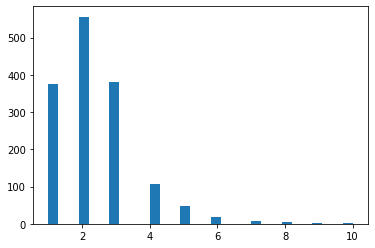

In [14]:
plt.hist(data['Hand'],bins=30);

In [15]:
data['Hand'].describe().round(3)

count    1500.000
mean        2.349
std         1.229
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        10.000
Name: Hand, dtype: float64

In [16]:
data.agg({"Hand": ["min", "max","mean", "median","std"]}).round(3)

,Hand
min,1.000
max,10.000
mean,2.349
median,2.000
std,1.229


> <hr>
> <u>Function Explanation:</u>
> 
> The function `handle_hand_column` processes the "Hand" column in the dataset, which represents the number of previous owners of a vehicle.
> 
> <u>The steps involved are:</u>
> 
> <u>1.</u> Filling Missing Values: Any missing values in the "Hand" column are filled with the median value of the column.
>
>    This approach ensures that the missing values do not skew the data and maintains the central tendency of the data.
>
> <hr>

In [17]:
def handle_hand_column(data):
    # Calculate the median and round it up if it's not an integer
    median_hand = data['Hand'].median()
    if not median_hand.is_integer():
        median_hand = np.ceil(median_hand)
    
    # Fill missing values with the (possibly rounded up) median
    data['Hand'] = data['Hand'].fillna(median_hand)
    
    return data

<a class="anchor" id='sec8'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>Gear</code>
</div>

The "Gear" column in our dataset contains the type of gear mechanism each car has. This column is categorical, with a finite number of possible gear types. Our data shows the following unique gear types:

In [18]:
data['Gear'].value_counts()

אוטומטית     1342
ידנית          79
טיפטרוניק      45
רובוטית        31
אוטומט          1
לא מוגדר        1
Name: Gear, dtype: int64

> It is evident and logical in the world that most vehicles are based on an automatic transmission,
> 
> for the sake of simplifying the model relatively we can use an opportunity here to lighten the number of categories for this feature.

> <u>1. Inconsistent Naming:</u>
> The gear types are represented inconsistently.
>
> For example, 'אוטומטית' and 'אוטומט' refer to the same gear type.
>
><u>2. Missing and Undefined Values:</u>
> There are missing values (nan) and entries labeled as 'לא מוגדר' which do not provide any meaningful information about the gear type.
> 

><u> Motivation for Standardizing Gear Types : </u>
>
><u> Consistency:</u>
> To ensure consistency in the dataset, we need to standardize the names of the gear types.
> 
> This helps in reducing redundancy and avoids treating the same gear type as different due to naming inconsistencies.

><u> Handling Missing Values:</u>
> Missing values in the "Gear" column can lead to issues in the analysis and modeling process.
> 
> By filling these missing values with a specific category, we ensure that every entry in the column is accounted for, improving the quality and robustness of our data.

><u> Steps to Handle the Gear Column :</u>
> 
><u>Standardizing Gear Names:</u>
> We use a dictionary to map various representations of gear types to a standardized Hebrew format. This ensures that 'automatic',
>
> 'auto', 'אוטומטי', and 'אוטומט' are all mapped to 'אוטומטית'.

><u> Filling Missing and Undefined Values:</u>
> We treat 'undefined' as missing and fill all missing values with the most common gear type in the dataset.
> 
> This choice is based on the assumption that the most common gear type is likely to be a reasonable default for missing entries.

> <hr>
> Using a dictionary to map the options is not the most efficient way or covers all the options,
> but here we assume because there are not many types in the field of car gear - we will allow it.
> <hr>

> <hr>

> `Auto_Gear` column:
> 
> is a new column with the help of which we have created in which we are reducing the categories of vehicle gear types in order to reduce the amount of >categories.
> <hr>

In [19]:
# Function to standardize gear names
def standardize_gear(gear):
    # Standardization dictionary for Gear types
    gear_mapping = {
        'automatic': 'אוטומטי',
        'auto': 'אוטומטי',
        'אוטומטית': 'אוטומטי',
        'אוטומט': 'אוטומטי',
        'tiptronic': 'טיפטרוניק',
        'manual': 'ידני',
        'ידני': 'ידני',
        'robotic': 'רובוטי',
        'רובוטית': 'רובוטי',
        'undefined': np.nan,  # Treat undefined as missing
        'לא מוגדר': np.nan
    }
    
    if pd.isna(gear):
        return gear
    gear = gear.lower().strip()
    return gear_mapping.get(gear, gear)

# Function to handle missing and undefined gear values
def handle_gear_column(data):
    # Standardize gear names
    data['Gear'] = data['Gear'].apply(standardize_gear)
    
    # Fill missing and undefined values with the most common gear type
    most_common_gear = data['Gear'].mode()[0]
    data['Gear'] = data['Gear'].fillna(most_common_gear)
   
    # Create new column Auto_Gear
    data['Auto_Gear'] = (data['Gear'] != 'אוטומטי').astype(int).astype('category')
    return data

<a class="anchor" id='sec9'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>Engine_type</code>
</div>

We will act here in a similar way to the car gear

In [20]:
data['Engine_type'].unique()

array(['בנזין', 'דיזל', 'גז', 'היברידי', 'היבריד', 'טורבו דיזל', nan,
       'חשמלי'], dtype=object)

In [21]:
# Function to standardize engine types
def standardize_engine_type(engine_type):
    # Standardization dictionary for Engine types
    engine_type_mapping = {
        'gasoline': 'בנזין',
        'diesel': 'דיזל',
        'turbo diesel': 'טורבו דיזל',
        'gas': 'גז',
        'hybrid': 'היברידי',
        'היבריד': 'היברידי',
        'היברידי': 'היברידי',
        'electrical': 'חשמלי',
        'חשמלי': 'חשמלי',
        'undefined': np.nan,  # Treat undefined as missing
        'לא מוגדר': np.nan
    }

    if pd.isna(engine_type):
        return engine_type
    engine_type = engine_type.lower().strip()
    return engine_type_mapping.get(engine_type, engine_type)

# Function to handle missing and undefined engine type values
def handle_engine_type_column(data):
    # Standardize engine types
    data['Engine_type'] = data['Engine_type'].apply(standardize_engine_type)
    
    # Fill missing and undefined values with the most common engine type
    most_common_engine_type = data['Engine_type'].mode()[0]
    data['Engine_type'] = data['Engine_type'].fillna(most_common_engine_type)
    
    return data

<a class="anchor" id='sec10'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>capacity_Engine</code>
</div>

> In terms of engine volume, we also checked here the distribution of the data and according to them we established relatively clear rules for what to do with
>
> each range of engine volume.
> Dealing with missing values.
> Extreme values ​​for both ends and engine types.
>
>All of these were treated accordingly in order to cover all the available options.

> We chose here to split into different cases as mentioned according to the distribution we saw.
>
> The cases are detailed in the comments in the code.

In [22]:
data['capacity_Engine'].dtype

dtype('O')

In [23]:
data['capacity_Engine'] = data['capacity_Engine'].replace(',', '', regex=True).astype(pd.Int64Dtype())

data['capacity_Engine'].describe()

count     1474.000000
mean      1665.293758
std        822.018723
min         13.000000
25%       1292.000000
50%       1500.000000
75%       1800.000000
max      15000.000000
Name: capacity_Engine, dtype: float64

In [24]:
print(f"null: {(data['capacity_Engine'].isnull().sum())}")
print(f"dtypes: {data['capacity_Engine'].dtypes}")

null: 26
dtypes: Int64


In [25]:
# Function to handle capacity_Engine column based on specified rules
def handle_capacity_engine_column(data, use_median=False, neutral_value=None):
    # Remove commas and convert to integer
    data['capacity_Engine'] = data['capacity_Engine'].replace(',', '', regex=True).astype(pd.Int64Dtype())
    
    # Calculate median and mean with standard deviation
    median_capacity = data['capacity_Engine'].median()
    mean_capacity = data['capacity_Engine'].mean()
    std_capacity = data['capacity_Engine'].std()
    
    # Function to handle each row
    def adjust_engine_capacity(row):
        if row['Engine_type'] == 'חשמלי':
            # Check if within one standard deviation of the mean
            if mean_capacity - std_capacity <= row['capacity_Engine'] <= mean_capacity + std_capacity:
                return row['capacity_Engine']
            else:
                return neutral_value if neutral_value is not None else (mean_capacity if not use_median else median_capacity)
        if pd.isna(row['capacity_Engine']):
            return mean_capacity if not use_median else median_capacity
        if row['capacity_Engine'] > 10000:
            return row['capacity_Engine'] / 10
        if row['capacity_Engine'] < 26:
            return row['capacity_Engine'] * 100
        if 0 <= row['capacity_Engine'] < 10:
            return  mean_capacity if not use_median else median_capacity
        if 26 < row['capacity_Engine'] < 800:
            return mean_capacity if not use_median else median_capacity
        return row['capacity_Engine']
    
    # Apply function to each row
    data['capacity_Engine'] = data.apply(adjust_engine_capacity, axis=1)
    data['capacity_Engine'] = data['capacity_Engine'].round(0)
    return data

<a class="anchor" id='sec11'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code>Prev_ownership , Curr_ownership , Description</code>
</div>

By the following actions on these columns we can implement a new feature:
Ownership_Value based on the presence of specific keywords in the relevant columns,
helping the predictive model in understanding potential factors that could affect the vehicle's price.

In [26]:
data["Prev_ownership"].unique()

array(['פרטית', nan, 'ליסינג', 'מונית', 'לא מוגדר', 'חברה', 'השכרה',
       'אחר', 'None', 'ממשלתי'], dtype=object)

In [27]:
data["Curr_ownership"].unique()

array(['פרטית', nan, 'לא מוגדר', 'אחר', 'None', 'ליסינג', 'חברה', 'השכרה'],
      dtype=object)

In [28]:
# Function to check ownership terms and assign values
def assign_ownership_value(row):
    ownership_terms_regex = r'ליסינג|השכרה|חברה'
    columns_to_check = ['Prev_ownership', 'Curr_ownership']
    
    for col in columns_to_check:
        if pd.notna(row[col]) and re.search(ownership_terms_regex, row[col]):
            return 1  # Assign value 1 if match found

    # Check only for "ליסינג" in the 'Description' column
    if pd.notna(row['Description']) and re.search(r'\bליסינג\b', row['Description']):
        return 1  # Assign value 1 if "ליסינג" found
    
    return 0  # Default value if no match found

<a class="anchor" id='sec12'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code> Area </code>
</div>

> The
> <code> Area </code>
> column represents geographical regions in the dataset, originally in Hebrew.
>
> We standardized and categorized these values to ensure consistency and usability in the predictive model. Here’s how we processed the
> <code> Area </code>
>column:

> <u> 1. Standardization of Area Names:</u>
>
> ● We created a dictionary, 
> <code> hebrew_areas </code>,
> to map various representations of area names to standardized Hebrew names.
>
> ● Using regular expressions, we replaced the area names in the
> <code> Area </code>
>column based on the
> <code> hebrew_areas </code>
> mappings.
>
> This step ensured that different representations of the same area were unified under a single name.

> <u> 2. Categorization into Regions: </u>
>
> ● We further grouped these standardized area names into broader regions using the
> <code> region_mappings </code>
> dictionary.
>
> ● A new column,
> <code> Area_new </code>
> , was created to represent these broader regions based on the standardized area names.

> <u> 3. Handling Missing Values: </u>
>
> ● We observed that some values in the <code> Area_new </code>
> column were missing.
>
> To address this, we implemented a method to fill in these missing values based on the relative frequencies of the existing values in the
> <code> Area_new </code>
> column.
>
> ● The function
> <code> fill_missing_area </code>
> calculates the probabilities of each region occurring and fills in the missing values by randomly selecting a region
>
> according to these probabilities.
>
> This approach maintains the overall distribution of regions in the dataset.

In [29]:
def handle_area_column(data):
    # Define mappings based on the provided Hebrew list
    hebrew_areas = {
        r"\bגליל(?:\s+ועמקים)?\b": "גליל ועמקים",
        r"\bחיפ(?:ה\s+וחוף\s+הכרמל)?\b": "חיפה וחוף הכרמל",
        r"\bעמק\s+יזרעאל\b": "עמק יזרעאל",
        r"\bקריות\b": "קריות",
        r"\bטבריה\s+והסביבה\b": "טבריה והסביבה",
        r"\bעכו\s+-\s+נהריה\b": "עכו - נהריה",
        r"\bכרמיאל\s+והסביבה\b": "כרמיאל והסביבה",
        r"\bמושבים\s+בצפון\b": "מושבים בצפון",
        r"\bרעננה\s+-\s+כפר\s+סבא\b": "רעננה - כפר סבא",
        r"\bנתניה\s+והסביבה\b": "נתניה והסביבה",
        r"\bרמת\s+השרון\s+-\s+הרצליה\b": "רמת השרון - הרצליה",
        r"\bמושבים\s+בשרון\b": "מושבים בשרון",
        r"\bחדרה\s+ותושבי\s+עמק\s+חפר\b": "חדרה ותושבי עמק חפר",
        r"\bפרדס\s+חנה\s+-\s+כרכור\b": "פרדס חנה - כרכור",
        r"\bהוד\s+השרון\s+והסביבה\b": "הוד השרון והסביבה",
        r"\bיישובי\s+השומרון\b": "יישובי השומרון",
        r"\bזכרון\s+-\s+בנימינה\b": "זכרון - בנימינה",
        r"\bאזור\s+השרון\s+והסביבה\b": "אזור השרון והסביבה",
        r"\bתל\s+אביב\b": "תל אביב",
        r"\bחולון\s+-\s+בת\s+ים\b": "חולון - בת ים",
        r"\bראשל\"צ\s+והסביבה\b": "ראשל\"צ והסביבה",
        r"\bרמת\s+גן\s+-\s+גבעתיים\b": "רמת גן - גבעתיים",
        r"\bפתח\s+תקווה\s+והסביבה\b": "פתח תקווה והסביבה",
        r"\bראש\s+העין\s+והסביבה\b": "ראש העין והסביבה",
        r"\bבני\s+ברק\b": "בני ברק",
        r"\bישובים\s+במרכז\b": "ישובים במרכז",
        r"\bירושלים\s+והסביבה\b": "ירושלים והסביבה",
        r"\bמודיעין\s+והסביבה\b": "מודיעין והסביבה",
        r"\bמושבים\s+באזור\s+ירושלים\b": "מושבים באזור ירושלים",
        r"\bאשדוד\s+-\s+אשקלון\b": "אשדוד - אשקלון",
        r"\bנס\s+ציונה\s+-\s+רחובות\b": "נס ציונה - רחובות",
        r"\bגדרה\s+יבנה\s+והסביבה\b": "גדרה יבנה והסביבה",
        r"\bרמלה\s+לוד\b": "רמלה לוד",
        r"\bמושבים\s+בשפלה\b": "מושבים בשפלה",
        r"\bבאר\s+שבע\s+והסביבה\b": "באר שבע והסביבה",
        r"\bאילת\s+והערבה\b": "אילת והערבה",
        r"\bמושבים\s+בדרום\b": "מושבים בדרום"
    }

    # Replace using regular expressions
    for pattern, replacement in hebrew_areas.items():
        data["Area"] = data["Area"].str.replace(pattern, replacement, regex=True)

    # Define mappings for regions based on the provided criteria
    region_mappings = {
        "אזור צפון": [
            "גליל ועמקים",
            "חיפה וחוף הכרמל",
            "עמק יזרעאל",
            "קריות",
            "טבריה והסביבה",
            "עכו - נהריה",
            "כרמיאל והסביבה",
            "מושבים בצפון"
        ],
        "אזור השרון והסביבה": [
            "רעננה - כפר סבא",
            "נתניה והסביבה",
            "רמת השרון - הרצליה",
            "מושבים בשרון",
            "חדרה ותושבי עמק חפר",
            "פרדס חנה - כרכור",
            "הוד השרון והסביבה",
            "זכרון - בנימינה",
            "אזור השרון והסביבה"
        ],
        "אזור מרכז": [
            "תל אביב",
            "חולון - בת ים",
            "ראשל\"צ והסביבה",
            "רמת גן - גבעתיים",
            "פתח תקווה והסביבה",
            "ראש העין והסביבה",
            "בני ברק",
            "ישובים במרכז"
        ],
        "אזור ירושלים והסביבה": [
            "ירושלים והסביבה",
            "מודיעין והסביבה",
            "מושבים באזור ירושלים"
        ],
        "אזור השפלה והסביבה": [
            "אשדוד - אשקלון",
            "נס ציונה - רחובות",
            "גדרה יבנה והסביבה",
            "רמלה לוד",
            "מושבים בשפלה"
        ],
        "אזור דרום": [
            "באר שבע והסביבה",
            "אילת והערבה",
            "מושבים בדרום"
        ]
    }

    # Create a new column "Region" based on mappings
    data["Area_new"] = None  # Initialize the new column

    for region, areas in region_mappings.items():
        data.loc[data["Area"].isin(areas), "Area_new"] = region

    return data

In [30]:
def fill_missing_area(data):
    # Calculate value counts and probabilities
    value_counts = data['Area_new'].value_counts(normalize=True)
    
    # Extract categories and probabilities
    categories = value_counts.index.tolist()
    probabilities = value_counts.values.tolist()
    
    # Function to fill missing values based on probabilities
    def fill_with_probability():
        return np.random.choice(categories, p=probabilities)
    
    # Apply the function to fill missing values
    data['Area_new'] = data['Area_new'].apply(lambda x: fill_with_probability() if pd.isna(x) else x)
    
    return data

<a class="anchor" id='sec13'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>Columns handling:</strong> <code> Km </code>
</div>

> __Removing commas and spaces:__ This step removes any commas and spaces from the Km values and converts them to strings.
> 
> __Removing non-numeric characters:__ This step removes any non-numeric characters from the Km values.
> 
> __Converting to numeric:__ The cleaned Km values are converted to numeric values. Any non-convertible values are set to 0.
> 
> __Rounding to whole numbers:__ The numeric Km values are rounded to the nearest whole number.
> 


> __Handle zero Km values for cars not from the current year:__
>
> If the vehicle is not from the current year and its Km value is 0, it is updated
>
> based on the vehicle's age and an average yearly distance of 16700 km.
> 
> __Handle 2 or 3-digit Km values:__
>
> For vehicles with Km values between 10 and 999,
> 
> the function calculates a temporary value by adding three zeros.
> 
> This value is checked against upper and lower limits based on the vehicle's age and the standard deviation of the Km values. If it falls within the
>
> limits, the temporary value is used; otherwise, the average of the limits is used.
>
> __Handle 4-digit Km values for cars not from the last two years:__
>
> For vehicles older than two years with Km values between 1000 and 5099, the Km
>
> value is multiplied by 10.
>
> __Handle Km values for cars from the last two years with hand number > 1:__
>
> For vehicles from the last two years with more than one previous owner
>
> and Km values below 100000, the Km value is multiplied by 10.
>
> __Fill missing values:__
>
> Any remaining missing values in the Km column are filled with the median or mean value, based on the use_median parameter.
>
> __Handle outliers using IQR method:__
>
> Outliers in the Km values are capped using the Interquartile Range (IQR) method.
>
> Values above the upper bound are capped at the upper bound, and values below the lower bound are capped at the lower bound.
>
> This process ensures that the Km column is cleaned, standardized, and handled appropriately for further analysis and modeling.

In [31]:
data['Km'].dtype

dtype('O')

In [32]:
def clean_km_column(data):
    # Remove commas, spaces, and convert to string
    data['Km'] = data['Km'].astype(str).replace(',', '', regex=True).str.strip()
    
    # Remove non-numeric characters
    data['Km'] = data['Km'].str.replace(r'\D+', '', regex=True)
    
    # Convert to numeric, handling non-numeric values
    data['Km'] = pd.to_numeric(data['Km'], errors='coerce').fillna(0)

    # Round to whole numbers
    data['Km'] = data['Km'].round().astype(int)

    return data

In [33]:
def handle_km_column(data, use_median=True):
    # Clean the Km column
    data = clean_km_column(data)
    
    # Define the current year
    current_year = data['Year'].max()
    
    # Add a column to indicate if the row has been processed
    data['processed'] = False
    
    # Iterate over each row to apply conditions
    for idx, row in data.iterrows():
        if row['Km'] <= 9 and row['Year'] < current_year and not row['processed']:
            data.at[idx, 'Km'] = (current_year - row['Year']) * 16700
            data.at[idx, 'processed'] = True
            continue  # Move to the next row
        
        if 10 <= row['Km'] < 1000 and not row['processed']:
            temp_km = row['Km'] * 1000
            vehicle_age = current_year - row['Year']
            std_dev = data['Km'].std()
            lower_limit = (vehicle_age - 0.5) * 16700 - (0.5 * std_dev)
            upper_limit = (vehicle_age + 0.5) * 16700 + (0.5 * std_dev)
            
            if lower_limit <= temp_km <= upper_limit:
                data.at[idx, 'Km'] = temp_km
            else:
                data.at[idx, 'Km'] = (lower_limit + upper_limit) / 2
            data.at[idx, 'processed'] = True
            continue  # Move to the next row
        
        if row['Year'] < current_year - 1 and 1000 <= row['Km'] < 10000 and not row['processed']:
            data.at[idx, 'Km'] = row['Km'] * 10
            data.at[idx, 'processed'] = True
            continue  # Move to the next row
        
        if row['Year'] in [current_year, current_year - 1] and row['Hand'] > 1 and row['Km'] < 100000 and not row['processed']:
            data.at[idx, 'Km'] = row['Km'] * 10
            data.at[idx, 'processed'] = True
            continue  # Move to the next row
    
    # Remove the 'processed' column as it is no longer needed
    data.drop(columns=['processed'], inplace=True)
    
    # Fill missing values with median or mean
    if use_median:
        fill_value = data['Km'].median()
    else:
        fill_value = data['Km'].mean()

    data['Km'] = data['Km'].fillna(fill_value)
    
    # Handle outliers using IQR method
    Q1 = data['Km'].quantile(0.25)
    Q3 = data['Km'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data.loc[data['Km'] > upper_bound, 'Km'] = upper_bound
    data.loc[data['Km'] < lower_bound, 'Km'] = lower_bound
    
    return data


<a class="anchor" id='sec14'></a>

<div style="background-color:#99D8FF; height: 5px; width: 100%; border-radius: 50px;"></div>

<div style="text-align: center;">
<strong>prepare_data function:</strong>
</div>

In [34]:
def prepare_data(data):
    
    # remove_Duplicates
    data = remove_Duplicates(data)
    
    # Standardize manufacturer names
    data['manufactor'] = data['manufactor'].apply(standardize_manufactor)

    # Clean manufactor name from model col
    data = remove_manufactor_name_in_model_col(data)
    
    # Clean and standardize the model names    
    data['model'] = data['model'].apply(clean_model_name)
    
    # converting to lowercase and removing extra spaces
    data['model'] = data['model'].apply(normalize_model_name)

    # Handle Hand column
    data = handle_hand_column(data)
    
    # Handle Gear column
    data = handle_gear_column(data)

    # Handle engine_type column
    data = handle_engine_type_column(data)

    # Handle capacity_engine column
    data = handle_capacity_engine_column(data)

    # Create a new column 'Ownership_Value' based on regex matches
    data['Ownership_Value'] = data.apply(assign_ownership_value, axis=1).astype('category')

    # Handle Area column
    data = handle_area_column(data)

    # Fill missing values in 'Area_new' based on probabilities
    data = fill_missing_area(data)

    # Handle km column
    data = handle_km_column(data)


    # Bin the Year column dynamically
    data = bin_year_column(data, num_bins=5)

    
    data = data.drop(columns=['Prev_ownership','Curr_ownership','Area','City',
                              'Pic_num','Cre_date','Repub_date','Description',
                              'Test', 'Supply_score','Color','Gear'])
                             #,'Year'])

    return data

In [35]:
# Apply the data_prep function to the dataset
prepared_data = prepare_data(data)

# Display a preview of the prepared data
prepared_data.head()
 

,manufactor,Year,model,Hand,capacity_Engine,Engine_type,Price,Km,Auto_Gear,Ownership_Value,Area_new,Year_range
0,יונדאי,2015,i35,2,1600.0,בנזין,51000.0,144000,0,0,אזור השרון והסביבה,2014-2016
1,ניסאן,2018,מיקרה,1,1200.0,בנזין,49000.0,69000,0,0,אזור השרון והסביבה,2017-2024
2,סוזוקי,2010,סוויפט,1,1450.0,בנזין,22500.0,145000,0,0,אזור צפון,1983-2011
3,טויוטה,2016,אוריס,1,1600.0,בנזין,63000.0,27300,1,0,אזור השפלה והסביבה,2016-2017
4,קיה,2012,פיקנטו,1,1248.0,בנזין,37000.0,70000,0,0,אזור מרכז,2011-2014


In [36]:
prepared_data.shape

(1372, 12)

In [37]:
prepared_data.columns

Index(['manufactor', 'Year', 'model', 'Hand', 'capacity_Engine', 'Engine_type',
       'Price', 'Km', 'Auto_Gear', 'Ownership_Value', 'Area_new',
       'Year_range'],
      dtype='object')

<a class="anchor" id='sec15'></a>

<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 5px; padding-bottom: 5px;"><b><b><span style='color:#99D8FF''></span></b> Data Preparation and ElasticNet Model Pipeline. </b></p></div>

> <strong>Step 1: Prepare Data<strong>
> 
> 'prepared_data' is the DataFrame after all processing.
>
> Separate the features (X) and the target variable (y).

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Assuming 'prepared_data' is the DataFrame after all processing
X = prepared_data.drop('Price', axis=1)
y = prepared_data['Price']

> <strong>Step 2: Identify Numerical and Categorical Features & Split the data into training and test sets<strong>
>
> Identify which columns are numerical and which are categorical.


In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # random_state = 42

# Identify numerical and categorical features
numerical_types = ['int','int16','int32','int64','float','float16','float32','float64']
numerical_features = X.select_dtypes(include= numerical_types).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(numerical_features)
print(categorical_features)

['Year', 'Hand', 'capacity_Engine', 'Km']
['manufactor', 'model', 'Engine_type', 'Auto_Gear', 'Ownership_Value', 'Area_new', 'Year_range']


> <strong>Step 3: Define Pipelines<strong>
>
> Define separate pipelines for numerical and categorical features to handle preprocessing.


In [40]:
# Define numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [41]:
# Define categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

> <strong>Step 4: Combine Pipelines into a ColumnTransformer<strong>
>
> Combine the numerical and categorical pipelines into a single `ColumnTransformer`.

In [42]:
# Combine numerical and categorical pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

> __Step 5: Define ElasticNet Model__

In [43]:
# Define the ElasticNet model
elastic_net = ElasticNet()

> __Step 6: Create Model Pipeline__
> 
> We create a pipeline that combines preprocessing and the ElasticNet model.

In [44]:
# Create the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', elastic_net)
])

> __Step 7: Define Parameter Grid for GridSearchCV and perform GridSearchCV__
>
> We define the parameter grid for GridSearchCV to search for the best hyperparameters.
>
> Then perform GridSearchCV to find the best hyperparameters.

In [45]:
# Define the parameter grid
param_grid = {
    'model__alpha': [0.00001,0.00001 ,0.0001, 0.001, 0.01, 0.1],
    'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# Define the GridSearchCV
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


In [46]:
# Fit the GridSearchCV According to train set 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Hand',
                                                                          'capacity_Engine',
                                                                          'Km']),
                                                                    

In [47]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'model__alpha': 0.001, 'model__l1_ratio': 0.1}


> __Step 8: Extract Best Model and Parameters__
> 
> Extract the best model and its parameters from the grid search and defining the model by the parameters,
> 
> then we will update the pipeline with the best model we have.

In [48]:
# Get the best model
best_model = grid_search.best_estimator_

# Extract the best alpha and l1_ratio
best_alpha = best_params['model__alpha']
best_l1_ratio = best_params['model__l1_ratio']

# Create the ElasticNet model with best parameters
final_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Update the pipeline with the best model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_elastic_net)
])

> __Step 9: Fit the final model pipeline on the training data__

In [49]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Hand',
                                                   'capacity_Engine', 'Km']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ig

> __Step 10: Perform 10-Fold Cross-Validation__
> 
> Perform `10-fold cross-validation` and print the `RMSE` scores for each fold.
> 

In [50]:
# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
cross_val_scores = cross_val_score(final_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
cross_val_rmse_scores = np.sqrt(-cross_val_scores)

print(f"Cross-Validation RMSE scores: {cross_val_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {cross_val_rmse_scores.mean():.2f}")
print(f"Standard Deviation of Cross-Validation RMSE: {cross_val_rmse_scores.std():.2f}")

Cross-Validation RMSE scores: [ 8713.983824   10886.95692717 11643.43554834 15530.87610322
 12274.63944189 11556.55231555 12819.22680944 12165.77082634
 10440.38157613 10997.84576561]
Mean Cross-Validation RMSE: 11702.97
Standard Deviation of Cross-Validation RMSE: 1677.98


>__Step 11: Preprocess Data and Get Feature Names__
>
> Preprocess the data and get the feature names after encoding.

In [51]:
'''
1. Get the Preprocessor and Model: 

Extract the preprocessor and the ElasticNet model from the final pipeline.
'''

# Get the preprocessor and model from the best pipeline
preprocessor = final_pipeline.named_steps['preprocessor']
elastic_net = final_pipeline.named_steps['model']

'''
2. Preprocess the Data: 

Preprocess the entire feature set X using the preprocessor to ensure it matches the format used during training.
'''
# Preprocess the data
X_processed = preprocessor.transform(X)

''' 
3. Get Feature Names: 
Retrieve the feature names after preprocessing. 
For numerical features, we simply use their column names. 
For categorical features, we get the names of the dummy variables created by OneHotEncoder
'''
# Get feature names after preprocessing
onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_feature_names)

>__Step 12: Calculate Feature Importance__
>
> In this step, we calculate the importance of each feature based on the coefficients from the `ElasticNet` model.
>
>

In [52]:
'''
4. Calculate Feature Importance:
Create a DataFrame with the feature names and their corresponding absolute coefficients from the ElasticNet model. 
The coefficients represent the importance of each feature.
'''

# Feature importance for ElasticNet (coefficient magnitude)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(elastic_net.coef_)
})


'''
5. Group Feature Importances: 
Group the feature importances by their original categorical feature. 
This step involves creating a dictionary to map dummy variables back to their original categorical feature and summing the importances.
'''

# Create feature groups dictionary
feature_groups = {}
for feature in categorical_features:
    dummies = [col for col in feature_names if col.startswith(feature)]
    for dummy in dummies:
        feature_groups[dummy] = feature

# Group importances
grouped_importance = feature_importance.groupby(
    feature_importance['feature'].map(lambda x: feature_groups.get(x, x))
).sum().sort_values('importance', ascending=False)

'''
6. Determine Impact: 
For each grouped feature, 
Calculate the overall impact (positive or negative) by summing the signed coefficients.
'''

# Calculate impact
grouped_importance['impact'] = 'Neutral'  # Default value

for index in grouped_importance.index:
    mask = feature_importance['feature'].map(lambda x: feature_groups.get(x, x)) == index
    if mask.any():
        relevant_features = feature_importance.loc[mask, 'feature']
        relevant_coefs = [elastic_net.coef_[feature_names.index(feat)] for feat in relevant_features]
        coef_sum = (feature_importance.loc[mask, 'importance'] * np.sign(relevant_coefs)).sum()
        grouped_importance.loc[index, 'impact'] = 'Positive' if coef_sum >= 0 else 'Negative'

'''
Print Top 5 Most Important Grouped Features: 
Print the top 5 grouped features along with their importance and impact.
'''

print("\nTop 5 most important grouped features with impact:")
for index, row in grouped_importance.head(5).iterrows():
    feature = index
    importance = row['importance']
    impact = row['impact']
    print(f"{feature}: {importance:.4f} ({impact})")


Top 5 most important grouped features with impact:
model: 1615930.4822 (Positive)
manufactor: 200502.9558 (Positive)
Year_range: 46951.8930 (Negative)
Engine_type: 18943.0023 (Negative)
Ownership_Value: 5084.4141 (Negative)


> __Step 13: Make Predictions and Evaluate the Model__
> 
> Make predictions on the test set and evaluate the model using metrics like `RMSE`, `R-squared`, `MAE`, and `MAPE`.

In [53]:
# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 10234.39
R-squared: 0.78
Adjusted R-squared: 0.77
MAE: 7584.85
MAPE: 18.33%


> __Step 14: Perform K-Fold Cross-Validation Again__
> 
> Finally, perform k-fold cross-validation again to ensure the robustness of our model.

In [54]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(final_pipeline, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert to positive RMSE
rmse_scores = np.sqrt(-cv_scores)
print("RMSE scores for each fold: ", rmse_scores)
print("Mean RMSE: ", rmse_scores.mean())
print("Standard Deviation of RMSE: ", rmse_scores.std())


RMSE scores for each fold:  [11019.08982527 10881.38921107 11377.08477799 11932.17102319
 14324.28801489 10349.58204412 10228.31522438 11824.83995774
 13313.58724609 10257.57024872]
Mean RMSE:  11550.791757345776
Standard Deviation of RMSE:  1290.1757105264066


<a class="anchor" id='sec16'></a>

<div style="color:white;display:fill;border-radius:25px;
            background-color:#99D8FF;font-size:150%; 
            letter-spacing:1.0px;background-image: url">
    <p style="padding: 8px;text-align: center;color:#464646; border-radius: 10px; padding-top: 5px; padding-bottom: 5px;"><b><b><span style='color:#99D8FF''></span></b> Analyze the outputs. </b></p></div>

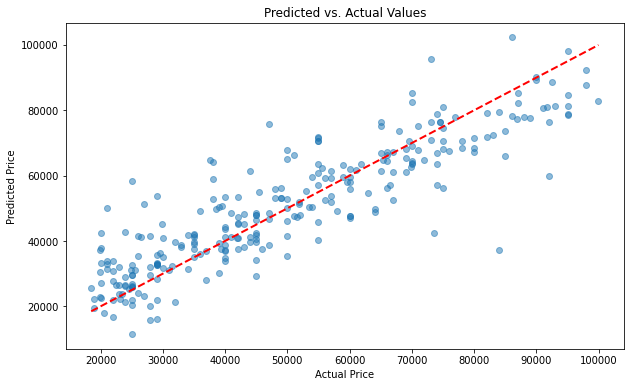

In [55]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Plotting Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Values')
plt.show()


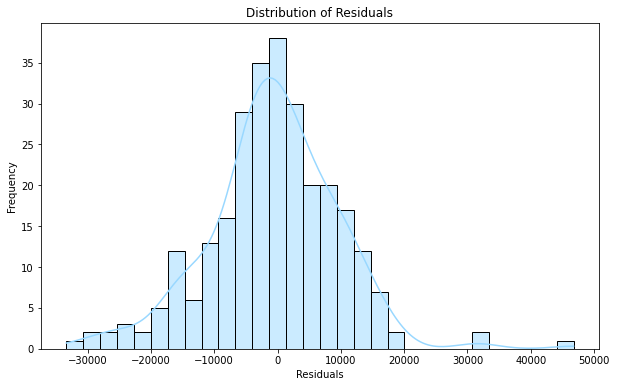

Skewness of the residuals: 0.08
Mean of the residuals: -634.85
Standard deviation of the residuals: 10214.68


In [56]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate statistics
residuals_skewness = skew(residuals)
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='#99D8FF')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Print statistics
print(f"Skewness of the residuals: {residuals_skewness:.2f}")
print(f"Mean of the residuals: {residuals_mean:.2f}")
print(f"Standard deviation of the residuals: {residuals_std:.2f}")

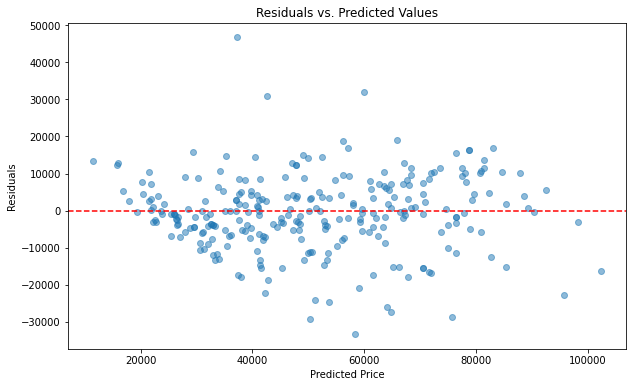

In [57]:
# Plotting Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


### Compare Training and Validation Errors

> Here, the test RMSE is higher than the training RMSE, R-squared Lower than the training R-squared, which suggests overfitting.
>
> which makes sense for a relatively small data size - the model despite this shows __stable performance.__

In [58]:
# Evaluate the model on the training set
y_train_pred = final_pipeline.predict(X_train)

# Calculate training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Calculate Adjusted R-squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

print("Step 1: Compare Training and Validation Errors")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Training Adjusted R-squared: {train_adjusted_r2:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Training MAPE: {train_mape:.2f}%")

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R-squared: {r2:.2f}")
print(f"Test Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE: {mape:.2f}%")


Step 1: Compare Training and Validation Errors
Training RMSE: 9451.21
Training R-squared: 0.82
Training Adjusted R-squared: 0.82
Training MAE: 6895.21
Training MAPE: 15.84%
Test RMSE: 10234.39
Test R-squared: 0.78
Test Adjusted R-squared: 0.77
Test MAE: 7584.85
Test MAPE: 18.33%


### Analyze Learning Curves

> Plot learning curves to visualize how the model performance (error) changes with varying sizes of the training dataset.
>
> The training error increases with the training size but stabilizes at around 8500 RMSE.
>
> The validation error decreases with more training data but stabilizes at a higher error rate (~12000 RMSE).
>
> The gap between the training and validation errors suggests that the model might benefit from more data or better regularization.
>
> This claim connects with the insight above due to the lack of data for the model.

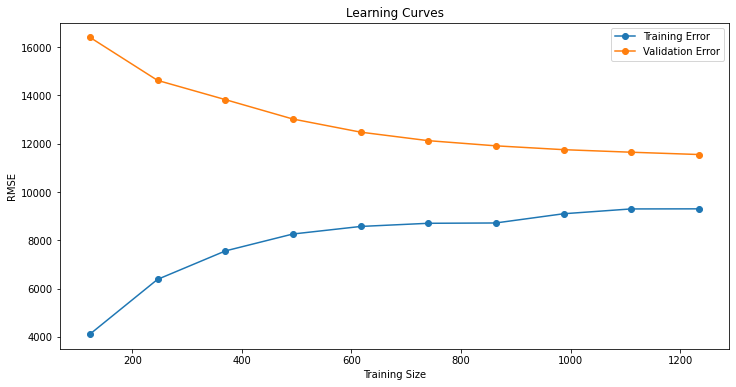

In [59]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_pipeline, X, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors = np.sqrt(-train_scores)
val_errors = np.sqrt(-val_scores)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_errors.mean(axis=1), 'o-', label="Training Error")
plt.plot(train_sizes, val_errors.mean(axis=1), 'o-', label="Validation Error")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Learning Curves")
plt.show()


#### Plot validation curves to understand how the model performance changes with different hyperparameters.

Due to the long running time for analysis the cell was switched to Raw mode
From the output of the graph, we deduced the range l1 desired for us

> The training error remains relatively low for smaller alpha values and increases as alpha increases.
>
> The validation error is lower for smaller alpha values and increases significantly as alpha increases beyond a certain point.
>
> The resulting range is above in the model build